In [16]:
import tensorflow as tf

In [17]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [18]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [20]:
data_count, feature_count = train_x.shape
data_count, feature_count

(426, 30)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(feature_count,)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [28]:
h = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100)

print(f"Train score: {model.evaluate(train_x, train_y)}")
print(f"Test score: {model.evaluate(test_x, test_y)}")

Epoch 1/100
14/14 [==============================] - 0s 10ms/step - loss: 1.0248 - accuracy: 0.4460 - val_loss: 0.9367 - val_accuracy: 0.4196
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8538 - accuracy: 0.5540 - val_loss: 0.8016 - val_accuracy: 0.4895
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7233 - accuracy: 0.6408 - val_loss: 0.6977 - val_accuracy: 0.5664
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6226 - accuracy: 0.7160 - val_loss: 0.6109 - val_accuracy: 0.6573
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5383 - accuracy: 0.7746 - val_loss: 0.5378 - val_accuracy: 0.7133
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4677 - accuracy: 0.8146 - val_loss: 0.47

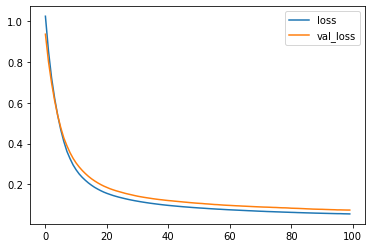

In [29]:
import matplotlib.pyplot as plt

plt.plot(h.history["loss"], label="loss")
plt.plot(h.history["val_loss"], label="val_loss")
plt.legend()

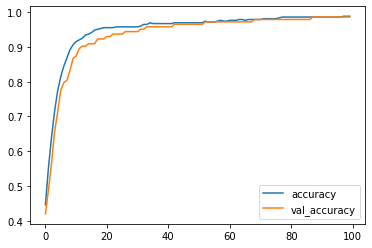

In [30]:
plt.plot(h.history["accuracy"], label="accuracy")
plt.plot(h.history["val_accuracy"], label="val_accuracy")
plt.legend()